# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf


2024-08-15 10:32:58.823922: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-15 10:33:03.250668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# download pizza_steak from https://github.com/mrdbourke
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-08-15 10:33:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.185.155, 142.250.185.187, 142.250.74.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.185.155|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-08-15 10:33:07 ERROR 403: Forbidden.



In [ ]:
import zipfile
# Unzip downloaded file
zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

In [ ]:
ls pizza_steak

test/  train/


In [ ]:
ls pizza_steak/test

pizza/  steak/


In [ ]:
ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg   625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg   65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  1

In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} ditectories and {len(filenames)} images in "{dirpath}".')

There are 2 ditectories and 0 images in "pizza_steak".
There are 2 ditectories and 0 images in "pizza_steak/test".
There are 0 ditectories and 250 images in "pizza_steak/test/pizza".
There are 0 ditectories and 250 images in "pizza_steak/test/steak".
There are 2 ditectories and 0 images in "pizza_steak/train".
There are 0 ditectories and 750 images in "pizza_steak/train/pizza".
There are 0 ditectories and 750 images in "pizza_steak/train/steak".


In [ ]:
!ls -la pizza_steak/

total 16
drwxrwxr-x 4 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 10 11:05 .
drwxrwxr-x 4 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 14 19:41 ..
drwxrwxr-x 4 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 10 11:05 test
drwxrwxr-x 4 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 10 11:05 train


In [ ]:
num_steak_train=len(os.listdir('pizza_steak/train/steak'))
num_steak_train

750

In [6]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


In [ ]:
data_dir

PosixPath('pizza_steak/train')

In [ ]:
list(data_dir.glob('*')) # Iterates the path by matching character

[PosixPath('pizza_steak/train/pizza'), PosixPath('pizza_steak/train/steak')]

In [ ]:
for item in data_dir.glob('*'):
  print(item)
  print(item.name)


pizza_steak/train/pizza
pizza
pizza_steak/train/steak
steak


In [ ]:
sorted([item.name for item in data_dir.glob('*')])

['pizza', 'steak']

In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [22]:
#let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [21]:
def view_random_image(target_dir,target_class):

    # Setup target directory
    target_folder= target_dir+ '/' + target_class

    # Get a random image path
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)

    # Read in the image
    img=mpimg.imread(target_folder + '/' + random_image[0])
    print(target_folder + '/' + random_image[0])

    # Plot the image
    #plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(target_class)

    print(f'Image shape: {img.shape}\n')

    return(img)

In [23]:
img=view_random_image('pizza_steak/train', 'pizza')

FileNotFoundError: [Errno 2] No such file or directory: 'pizza_steak/train/pizza'

In [ ]:
print(img)

[[[215 247 246]
  [216 248 247]
  [216 248 247]
  ...
  [135 155 143]
  [136 156 144]
  [138 158 146]]

 [[217 249 248]
  [217 249 248]
  [217 249 248]
  ...
  [137 157 145]
  [140 160 148]
  [142 162 150]]

 [[217 251 250]
  [218 252 251]
  [219 251 250]
  ...
  [139 159 147]
  [142 162 150]
  [145 165 153]]

 ...

 [[ 63  80  88]
  [ 62  79  87]
  [ 62  79  87]
  ...
  [ 33  49  48]
  [ 33  47  47]
  [ 32  46  46]]

 [[ 58  75  83]
  [ 59  76  84]
  [ 61  78  86]
  ...
  [ 34  50  49]
  [ 33  47  47]
  [ 32  46  46]]

 [[ 46  63  71]
  [ 49  66  74]
  [ 54  71  79]
  ...
  [ 34  50  49]
  [ 34  48  48]
  [ 32  46  46]]]


In [ ]:
img.shape #Heigh, Width, Color channel

(384, 512, 3)

In [ ]:
from sklearn.preprocessing import Normalizer,StandardScaler, normalize

In [ ]:
img[:,:,0].shape

(384, 512)

In [ ]:
norm_img=Normalizer().transform(img[:,:,0])

In [ ]:
norm_img, norm_img.min(), norm_img.max()

(array([[0.07146642, 0.07179883, 0.07179883, ..., 0.04487427, 0.04520667,
         0.04587147],
        [0.07234551, 0.07234551, 0.07234551, ..., 0.04567436, 0.04667452,
         0.0473413 ],
        [0.07222366, 0.07255649, 0.07288932, ..., 0.04626308, 0.04726157,
         0.04826005],
        ...,
        [0.06153547, 0.06055872, 0.06055872, ..., 0.03223286, 0.03223286,
         0.03125611],
        [0.05753498, 0.05852697, 0.06051093, ..., 0.0337274 , 0.03273542,
         0.03174344],
        [0.04612844, 0.04913682, 0.05415078, ..., 0.03409493, 0.03409493,
         0.03208935]]),
 0.009033866198669355,
 0.1333977728560789)

In [ ]:
std_img=StandardScaler().fit_transform(img[:,:,0])

In [ ]:
std_img, std_img.min(), std_img.max()

(array([[ 1.90308574,  1.90707789,  1.88419294, ...,  0.6025684 ,
          0.62834083,  0.69696533],
        [ 1.93813538,  1.92441702,  1.90130698, ...,  0.65114325,
          0.7259077 ,  0.79510786],
        [ 1.93813538,  1.94175614,  1.93553505, ...,  0.69971809,
          0.77469114,  0.86871476],
        ...,
        [-0.76068665, -0.76314723, -0.75136856, ..., -1.87474862,
         -1.88400617, -1.90381178],
        [-0.84831074, -0.81516461, -0.7684826 , ..., -1.85046119,
         -1.88400617, -1.90381178],
        [-1.05860856, -0.98855585, -0.88828085, ..., -1.85046119,
         -1.85961445, -1.90381178]]),
 -2.490786397919883,
 2.2546024006613212)

In [ ]:
norm2_img=normalize(img[:,:,0])

In [ ]:
norm2_img.min(), norm2_img.max()

(0.009033866198669355, 0.1333977728560789)

## An end-to-end example

- Load images
- Preprocess images
- Build CNN model
- Compile CNN model
- Fit the CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Creating firs CNN model
tf.random.set_seed(0)

# Preprocess data -> scaling/normalizing -> get data between 0 and one
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

# Import data from directories and turn into batches
train_data=train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224),
                                             class_mode='binary', seed=0)
valid_data=valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224),
                                             class_mode='binary', seed=0)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1= model_1.fit(train_data, epochs=5, batch_size=32,
            validation_data=valid_data, validation_batch_size=32) # validation_steps=len(valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-15 10:33:16.671694: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5


/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6490 - loss: 0.6417 - val_accuracy: 0.8340 - val_loss: 0.4450
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7969 - loss: 0.4623 - val_accuracy: 0.8420 - val_loss: 0.3999
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8016 - loss: 0.4447 - val_accuracy: 0.8480 - val_loss: 0.3668
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8454 - loss: 0.3681 - val_accuracy: 0.8480 - val_loss: 0.3441
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8692 - loss: 0.3251 - val_accuracy: 0.8560 - val_loss: 0.3504


In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.8926 - loss: 0.2921


[0.3503835201263428, 0.8560000061988831]

In [ ]:
import gc


In [ ]:
gc.isenabled()

True

In [ ]:
gc.collect()

3908

In [ ]:
len(train_data) # batch_size = 32, steps_per_epoch=47

47

In [ ]:
1500/32

46.875

In [ ]:
len(valid_data) # batch_size=32, validation_steps=16

16

In [ ]:
500/32

15.625

In [ ]:
'''
from tensorflow.keras.utils import image_dataset_from_directory

# Creating firs CNN model
tf.random.set_seed(0)

# Setup path to our data directories
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

# Preprocess data -> scaling/normalizing -> get data between 0 and one
#train_datagen=ImageDataGenerator(rescale=1./255)
train_datagen=image_dataset_from_directory(directory=train_dir, batch_size=32, image_size=(224,224), label_mode='binary', seed=0)

#valid_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=image_dataset_from_directory(directory=test_dir,batch_size=32, image_size=(224,224), label_mode='binary', seed=0)

# Import data from directories and turn into batches
train_data=train_datagen
valid_data=valid_datagen

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
#model_1.fit(train_data, epochs=2, batch_size=32, validation_data=valid_data, validation_batch_size=32)
'''

"\nfrom tensorflow.keras.utils import image_dataset_from_directory\n\n# Creating firs CNN model\ntf.random.set_seed(0)\n\n# Setup path to our data directories\ntrain_dir='/content/pizza_steak/train'\ntest_dir='/content/pizza_steak/test'\n\n# Preprocess data -> scaling/normalizing -> get data between 0 and one\n#train_datagen=ImageDataGenerator(rescale=1./255)\ntrain_datagen=image_dataset_from_directory(directory=train_dir, batch_size=32, image_size=(224,224), label_mode='binary', seed=0)\n\n#valid_datagen=ImageDataGenerator(rescale=1./255)\nvalid_datagen=image_dataset_from_directory(directory=test_dir,batch_size=32, image_size=(224,224), label_mode='binary', seed=0)\n\n# Import data from directories and turn into batches\ntrain_data=train_datagen\nvalid_data=valid_datagen\n\n# Build a CNN model (same as the Tiny VGG on the CNN explainer website)\nmodel_1=tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),\n   

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
53*53*10

28090

## Using the same model as before

In [ ]:
tf.random.set_seed(0)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )
history_2=model_2.fit(train_data, epochs=5, batch_size=32,
            validation_data=valid_data, validation_batch_size=32)

/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.4981 - loss: 2.0028 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.5089 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4923 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4785 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.4904 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
len(train_data), len(train_data[0]), len(train_data[0][0]), len(train_data[0][0][0])

(47, 2, 32, 224)

In [ ]:
32*47

1504

In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly... let's try to improve it

In [ ]:
tf.random.set_seed(0)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3=model_3.fit(train_data, epochs=5, batch_size=32,
            validation_data=valid_data, validation_batch_size=32)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 272ms/step - accuracy: 0.5914 - loss: 4.9333 - val_accuracy: 0.5060 - val_loss: 3.0118
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - accuracy: 0.6254 - loss: 2.0114 - val_accuracy: 0.7500 - val_loss: 0.5329
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - accuracy: 0.7026 - loss: 0.7380 - val_accuracy: 0.6120 - val_loss: 1.0336
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.7334 - loss: 0.6785 - val_accuracy: 0.7060 - val_loss: 0.6452
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.8016 - loss: 0.4536 - val_accuracy: 0.7140 - val_loss: 0.6007


In [ ]:
gc.collect()

1556

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
15000000/31000

483.8709677419355

## Binary classification: Let's break it down

- Visualize the data: becoming one with data
- Preprocessing the data: scaling/normalizing data, turn data into batches
- Create a model
- Fit the model
- Evaluation the model
- Adjust defferent parameters and imprive the model
- Repeat until satisfied

### 1. Becomeone the data

['1889336.jpg']
pizza_steak/train/steak/1889336.jpg
Image shape: (512, 511, 3)

['2990186.jpg']
pizza_steak/train/pizza/2990186.jpg
Image shape: (341, 512, 3)



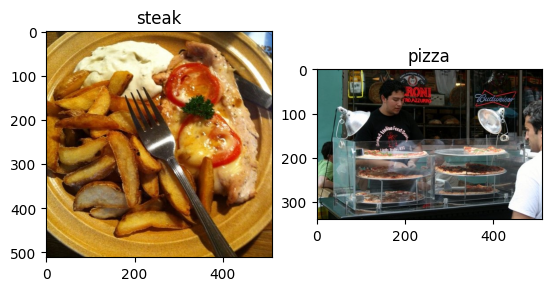

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('pizza_steak/train','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('pizza_steak/train','pizza')

### 2. Preprocess the data

In [ ]:
# Define directory dataset path
train_dir='pizza_steak/train/'
test_dir='pizza_steak/test/'

### Our next step is to turn our data into **batches**

In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1/255.)
test_data_gen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Loud in our images from directotyand turn them into batches
train_data=train_data_gen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224),color_mode='rgb',
                                              class_mode='binary', seed=0)

test_data=test_data_gen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), color_mode='rgb',
                                            class_mode='binary', seed=0)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get the sample of train data batch
images, labels= next(train_data) # get the next batch of images/labels in train data
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [ ]:
labels

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
      dtype=float32)

In [ ]:
len(train_data), len(train_data[0]), len(train_data[0][0]), len(train_data[0][0][0]), len(train_data[0][0][0][0]), len(train_data[0][0][0][0][0])

(47, 2, 32, 224, 224, 3)

In [ ]:
images[0].shape, images[0]

((224, 224, 3),
 array([[[0.20000002, 0.20392159, 0.32156864],
         [0.23529413, 0.21960786, 0.3254902 ],
         [0.3372549 , 0.2901961 , 0.38431376],
         ...,
         [0.10980393, 0.07058824, 0.0627451 ],
         [0.09019608, 0.0627451 , 0.03137255],
         [0.08235294, 0.05882353, 0.01176471]],
 
        [[0.2627451 , 0.25490198, 0.34901962],
         [0.29411766, 0.27450982, 0.3529412 ],
         [0.27450982, 0.23137257, 0.29411766],
         ...,
         [0.12941177, 0.09019608, 0.08235294],
         [0.07843138, 0.04705883, 0.03921569],
         [0.09803922, 0.06666667, 0.05882353]],
 
        [[0.3254902 , 0.3019608 , 0.34901962],
         [0.3137255 , 0.27450982, 0.31764707],
         [0.34901962, 0.2901961 , 0.31764707],
         ...,
         [0.09803922, 0.05882353, 0.05490196],
         [0.1137255 , 0.07843138, 0.09803922],
         [0.07450981, 0.03529412, 0.06666667]],
 
        ...,
 
        [[0.38823533, 0.2392157 , 0.19607845],
         [0.43529415, 0.2

### 3. Create a CNN model (start with base line)

In [ ]:
# Make the creating our model a little easier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D,  Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy


In [ ]:
# Create the model (this will be our baseline)
model_4=Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)), # Input layer
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # Output layer
])



In [ ]:
# Compile the model
model_4.compile(loss=BinaryFocalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
218*218*10

475240

In [ ]:
477341 - 475240

2101

### 4. Fit the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4= model_4.fit(train_data, epochs=5, batch_size=32,
                       validation_data=test_data, validation_batch_size=32)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6314 - loss: 0.2090 - val_accuracy: 0.7940 - val_loss: 0.1155
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8821 - loss: 0.0839 - val_accuracy: 0.8320 - val_loss: 0.0974
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9519 - loss: 0.0456 - val_accuracy: 0.8180 - val_loss: 0.1068
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9849 - loss: 0.0223 - val_accuracy: 0.8380 - val_loss: 0.1172
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9957 - loss: 0.0061 - val_accuracy: 0.8340 - val_loss: 0.1269


In [ ]:
model_1.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.8891 - loss: 0.2780


[0.274543821811676, 0.8986666798591614]

In [ ]:
model_4.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 497ms/step - accuracy: 0.9990 - loss: 0.0026


[0.0025454771239310503, 0.9993333220481873]

In [ ]:
gc.isenabled()

True

In [ ]:
gc.collect()

1560

### 5. Evaluating our mode

<Axes: >

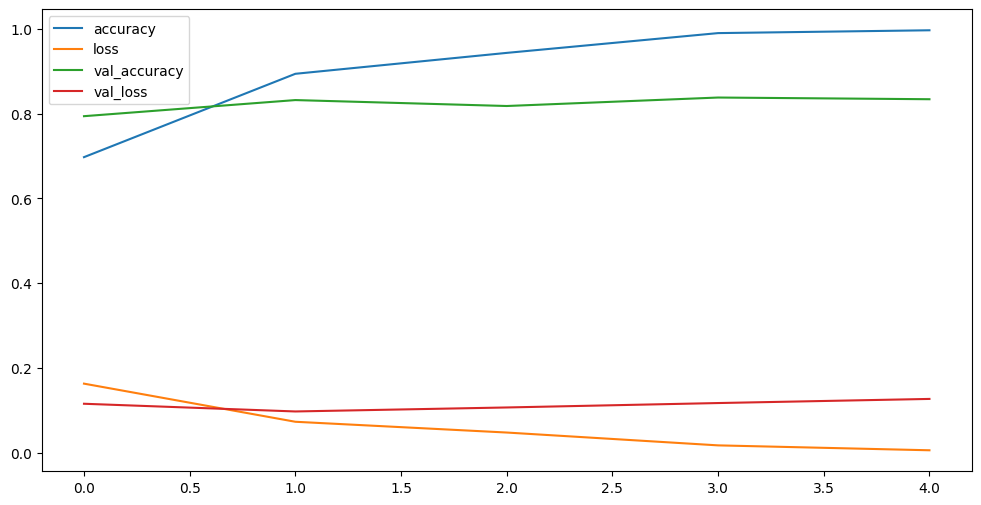

In [ ]:
# Plotting training/loss curves
pd.DataFrame(history_4.history).plot(figsize=(12,6))

In [21]:
def plot_loss_curves(history):
    import matplotlib.pyplot as plt 
    
    plt.figure(figsize=(18,6))

    plt.subplot(121)
    #plt.figure(figsize=(12,6))
    plt.plot(tf.range(len(history.history['loss'])), history.history['accuracy'], label='training_accuracy')
    plt.plot(tf.range(len(history.history['loss'])), history.history['val_accuracy'], label='val_accuracy')

    plt.xlabel('epochs')
    plt.ylabel('')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(122)
    #plt.figure(figsize=(12,6))
    plt.plot(tf.range(len(history.history['loss'])), history.history['loss'], label='training_loss')
    plt.plot(tf.range(len(history.history['loss'])), history.history['val_loss'], label='val_loss')

    plt.xlabel('epochs')
    plt.ylabel('')
    plt.title('Loss')
    plt.legend()


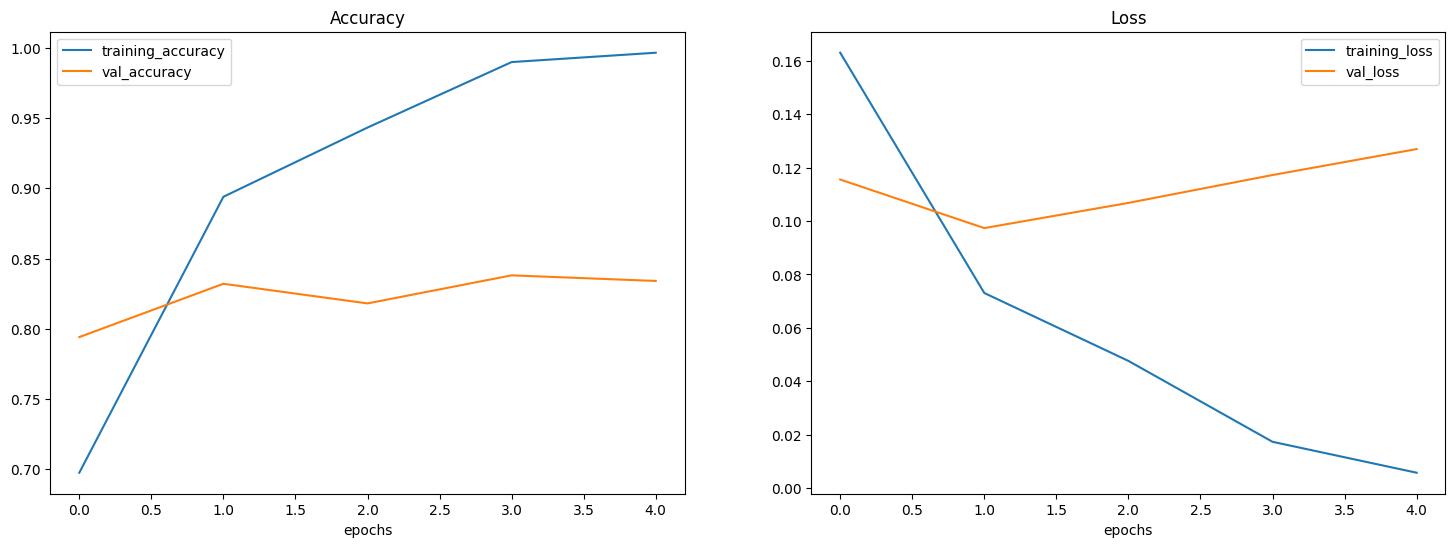

In [ ]:
plot_loss_curves(history_4)

> **validation loss** is increasing -> model is **over fitting**

In [ ]:
pd.DataFrame(history_4.history)

accuracy      loss  val_accuracy  val_loss
0  0.697333  0.163004         0.794  0.115543
1  0.894000  0.073059         0.832  0.097359
2  0.943333  0.047643         0.818  0.106788
3  0.990000  0.017361         0.838  0.117222
4  0.996667  0.005786         0.834  0.126938

In [ ]:
len(history_4.history['loss'])

5

In [ ]:
len(history_4.history['accuracy'])

5

In [ ]:
tf.range(len(history_4.history['loss']))

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

- Create abaseline
- Beat the baseline by overfitting a larger model
- Reduce overfitting

Induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flatten layer

Reduce overfitting:

- Add more data
- Add data augmentation
- Simplify the model (reduce conv layers or conv units)
- Add reqularization layers (such as MaxPool2D)
- Better data
- Transfer learning

> **Note**: Reducing overfitting is also known as **Regularization**

In [ ]:
len(train_data), len(train_data[0]), len(train_data[0][0]), len(train_data[0][0][0]), len(train_data[0][0][0][0]), len(train_data[0][0][0][0][0])

(47, 2, 32, 224, 224, 3)

In [ ]:
len(train_data), len(train_data[0]), len(train_data[0][1])

(47, 2, 32)

In [ ]:
train_data[0][0][0].shape

(224, 224, 3)

In [ ]:
train_data[0][1].shape

(32,)

In [ ]:
train_data[0][1]

array([1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

In [ ]:
# Create the model(this is going to be our new baseline)

model_5=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])


/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_5.compile(loss=BinaryFocalCrossentropy(),
               optimizer=Adam(),
               metrics=['accuracy'])


In [ ]:
# Fit the model
history_5=model_5.fit(train_data,batch_size=32,epochs=5,
                     validation_data=test_data, validation_batch_size=32)

Epoch 1/5


/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 697ms/step - accuracy: 0.5884 - loss: 0.6361 - val_accuracy: 0.5360 - val_loss: 0.1719
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 694ms/step - accuracy: 0.5311 - loss: 0.1716 - val_accuracy: 0.7420 - val_loss: 0.1592
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 726ms/step - accuracy: 0.6777 - loss: 0.1551 - val_accuracy: 0.6800 - val_loss: 0.1638
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 733ms/step - accuracy: 0.7131 - loss: 0.1570 - val_accuracy: 0.7860 - val_loss: 0.1471
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 709ms/step - accuracy: 0.7451 - loss: 0.1430 - val_accuracy: 0.5940 - val_loss: 0.1684


In [ ]:
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.8371 - loss: 0.1067


[0.16837343573570251, 0.593999981880188]

In [ ]:
# Get the modek sumary
model_5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

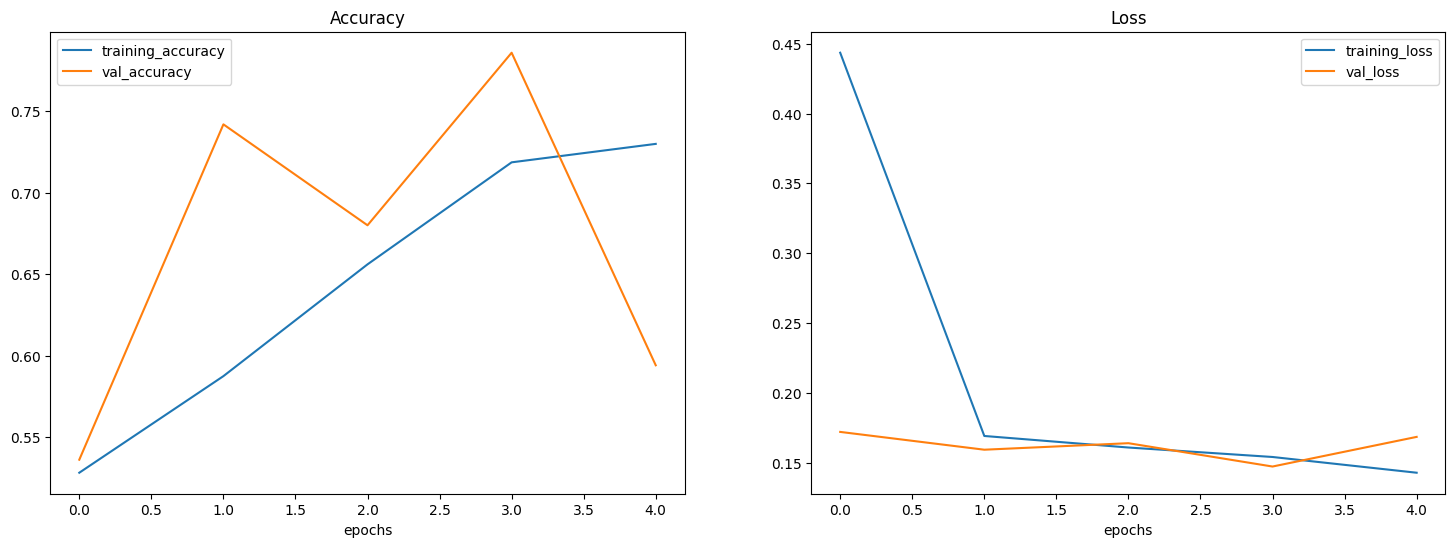

In [ ]:
# Plot loss cueve
plot_loss_curves(history_5)

#### Data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_data_gen_augmented=ImageDataGenerator(rescale=1/255.,
                                            rotation_range=10,
                                            zoom_range=.2,
                                            shear_range=.2,
                                            width_shift_range=.2,
                                            height_shift_range=.2,
                                            horizontal_flip=True
                                           )

# Create ImageDataGenerator without data augmentation for train dataset
train_data_gen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_data_gen=ImageDataGenerator(rescale=1/255.)



Visualize data augmentation

In [ ]:
# Import data and augment it from training directory without shuffeling
print('Augmented training data:')
train_data_augmented=train_data_gen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 class_mode='binary',
                                                                 batch_size=32,
                                                                 shuffle=False)

# Crate non-augmented train data batches
print('\nNon-augmented training data:')
train_data=train_data_gen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=True)

# Create non-augmented test data batches
print('\nNon-augmented test data:')
test_data=test_data_gen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32,
                                           shuffle=True)

Augmented training data:
Found 1500 images belonging to 2 classes.

Non-augmented training data:
Found 1500 images belonging to 2 classes.

Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
train_dir

'pizza_steak/train/'

> **Note**: Data augmentation is usually performed on training data

In [ ]:
# Get sample data batches
images, labels=next(train_data)

augmented_images, _=next(train_data_augmented)
# Note: labels are n't augmented ... only data

showing image number: 0


Text(0.5, 1.0, 'Augmented image')

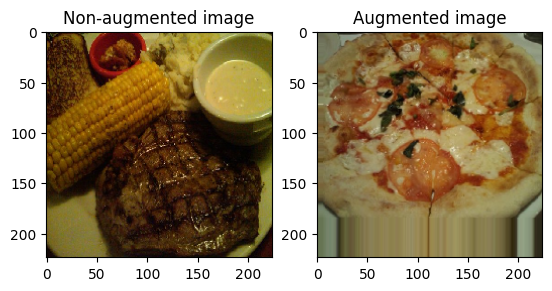

In [ ]:
# Show original image and augmented image
import random
random_number=random.randint(0,31) # Our batch size are 32
print(F'showing image number: {random_number}')

plt.subplot(121)
plt.imshow(images[random_number])
plt.title('Non-augmented image')

plt.subplot(122)
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')


In [ ]:
images[0]

array([[[0.13333334, 0.14509805, 0.07058824],
        [0.18431373, 0.19607845, 0.12156864],
        [0.21568629, 0.227451  , 0.14509805],
        ...,
        [0.2627451 , 0.2784314 , 0.21960786],
        [0.26666668, 0.28235295, 0.22352943],
        [0.24705884, 0.2627451 , 0.20392159]],

       [[0.14509805, 0.15686275, 0.08235294],
        [0.18431373, 0.19607845, 0.12156864],
        [0.21568629, 0.227451  , 0.14509805],
        ...,
        [0.21568629, 0.23137257, 0.1764706 ],
        [0.20784315, 0.22352943, 0.16862746],
        [0.19215688, 0.20784315, 0.15294118]],

       [[0.22352943, 0.23529413, 0.16078432],
        [0.19215688, 0.20392159, 0.12156864],
        [0.29411766, 0.30980393, 0.21960786],
        ...,
        [0.11764707, 0.12941177, 0.09411766],
        [0.10980393, 0.12156864, 0.08627451],
        [0.10588236, 0.11764707, 0.08235294]],

       ...,

       [[0.454902  , 0.48235297, 0.36078432],
        [0.45098042, 0.4784314 , 0.35686275],
        [0.45098042, 0

In [ ]:
# Create a model and fit it with augmented and non-shuffled data
model_6=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_6.compile(loss=BinaryFocalCrossentropy(),
               optimizer=Adam(),
               metrics=['accuracy'])

history_6=model_6.fit(train_data_augmented, batch_size=32, epochs=5,
           validation_data=test_data, validation_batch_size=32)

/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 817ms/step - accuracy: 0.4751 - loss: 0.1890 - val_accuracy: 0.6060 - val_loss: 0.1716
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 948ms/step - accuracy: 0.5197 - loss: 0.1724 - val_accuracy: 0.6640 - val_loss: 0.1658
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 803ms/step - accuracy: 0.5729 - loss: 0.1698 - val_accuracy: 0.7220 - val_loss: 0.1570
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 861ms/step - accuracy: 0.6703 - loss: 0.1582 - val_accuracy: 0.7420 - val_loss: 0.1373
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 840ms/step - accuracy: 0.6806 - loss: 0.1604 - val_accuracy: 0.7080 - val_loss: 0.1362


In [ ]:
model_6.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.5646 - loss: 0.1819


[0.13617825508117676, 0.7080000042915344]

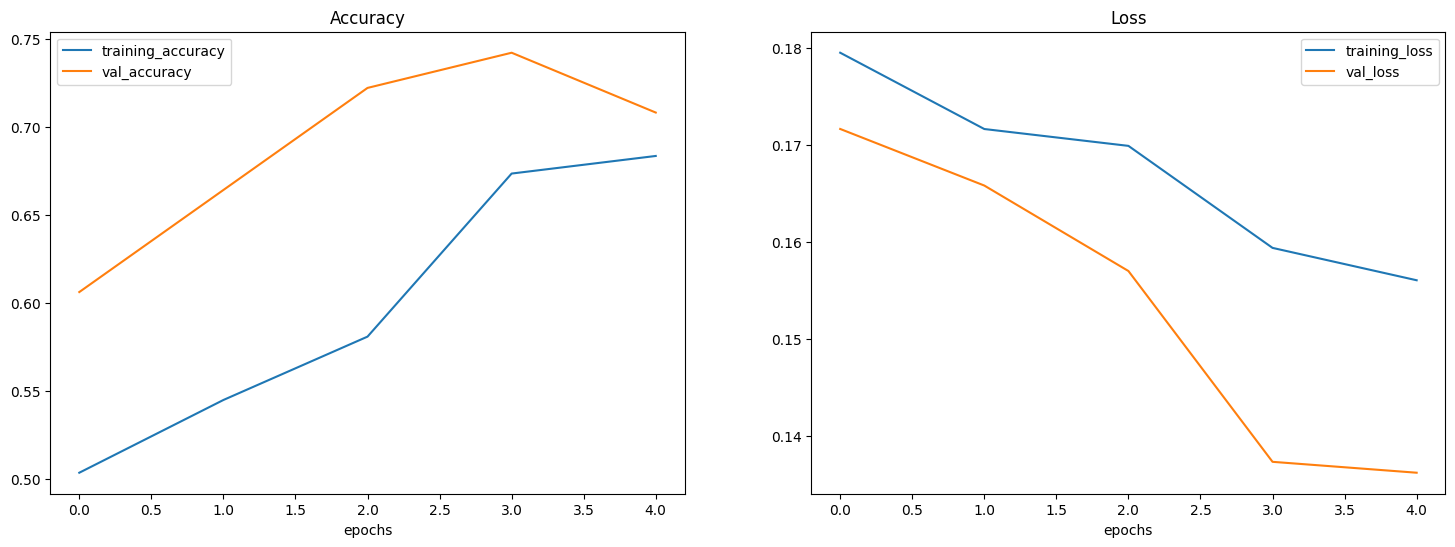

In [ ]:
# Check the loss curve
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train a model as same as before and see what happend

In [ ]:
# Create augmented train data with shuffling
train_data_augmented_shuffled=train_data_gen_augmented.flow_from_directory(train_dir,
                                                                          batch_size=32,
                                                                          target_size=(224,224),
                                                                          class_mode='binary',
                                                                          shuffle=True,
                                                                          seed=0)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model and fit it with augmented and shuffled data
model_7=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss=BinaryFocalCrossentropy(),
               optimizer=Adam(),
               metrics=['accuracy'])

history_7=model_7.fit(train_data_augmented_shuffled,batch_size=32,epochs=5,
                     validation_data=test_data,validation_batch_size=32)

/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.6185 - loss: 0.1630

/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 855ms/step - accuracy: 0.6192 - loss: 0.1628 - val_accuracy: 0.8140 - val_loss: 0.1176
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 976ms/step - accuracy: 0.7212 - loss: 0.1379 - val_accuracy: 0.8560 - val_loss: 0.0920
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 885ms/step - accuracy: 0.7788 - loss: 0.1197 - val_accuracy: 0.7660 - val_loss: 0.1190
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 880ms/step - accuracy: 0.7393 - loss: 0.1363 - val_accuracy: 0.8540 - val_loss: 0.0939
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 846ms/step - accuracy: 0.7874 - loss: 0.1179 - val_accuracy: 0.8520 - val_loss: 0.0866


In [ ]:
model_7.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.8567 - loss: 0.0827


[0.08658284693956375, 0.8519999980926514]

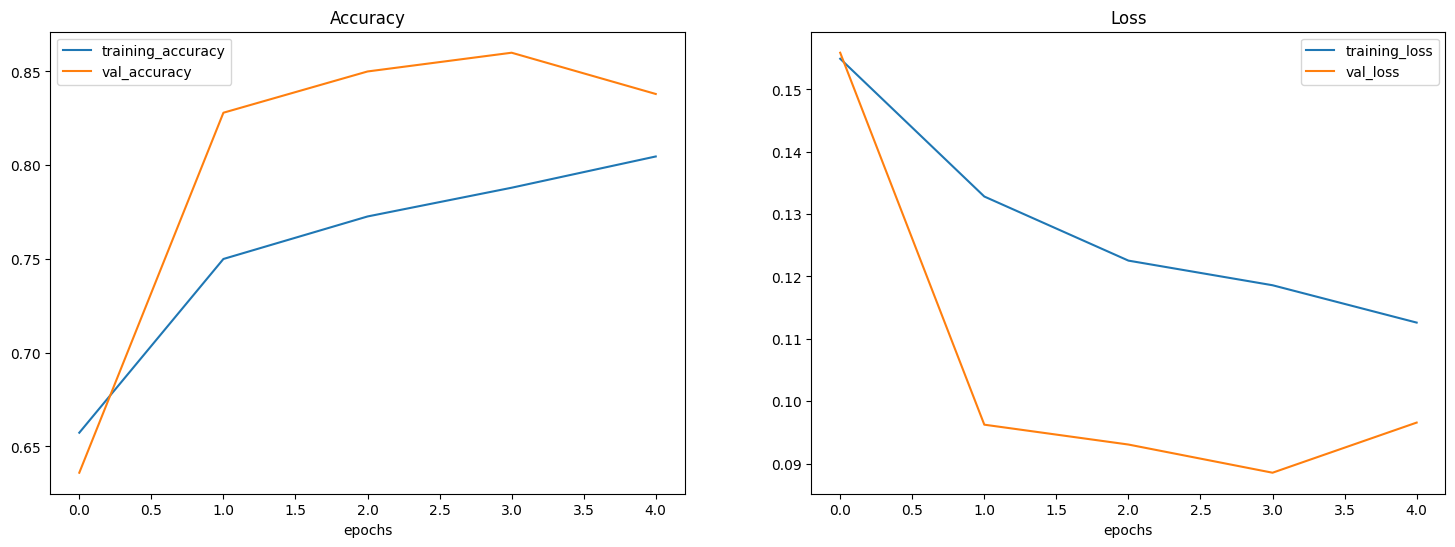

In [ ]:
plot_loss_curves(history_7)

**Note**: In our case when we don't shuffle the data, mode first learns pizza pattern and after that learns steak patterns. when we shuffle data, model learns both paterns simultaneously

### 7. Repeat until satisfied

- Increase the number og model layers e.g. `Conv2D` / `MaxPool2D`
- Increase the number of filters in each Conv2D e.g. from 10 to 32 or 64
- Find the ideal learning rate
- Train for longer (more epochs)
- Train with more data(more apportunities to learn patterns)
 - Use `Transfer Learning`

In [ ]:
# Create the model as CNN Explainer site (model_1) with augmented shuffled data
model_8=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_8.compile(optimizer=Adam(),
               loss=BinaryFocalCrossentropy(),
               metrics=['accuracy'])

history_8=model_8.fit(train_data_augmented_shuffled,batch_size=32,epochs=5,
           validation_data=test_data,validation_batch_size=32)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5141 - loss: 0.1742 - val_accuracy: 0.7180 - val_loss: 0.1390
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6749 - loss: 0.1559 - val_accuracy: 0.8340 - val_loss: 0.1056
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7705 - loss: 0.1247 - val_accuracy: 0.7640 - val_loss: 0.1176
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7441 - loss: 0.1281 - val_accuracy: 0.8380 - val_loss: 0.0996
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.7731 - loss: 0.1197 - val_accuracy: 0.7380 - val_loss: 0.1305


In [ ]:
model_8.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.5890 - loss: 0.1858


[0.1304667592048645, 0.7379999756813049]

In [ ]:
47*32, 16*32

(1504, 512)

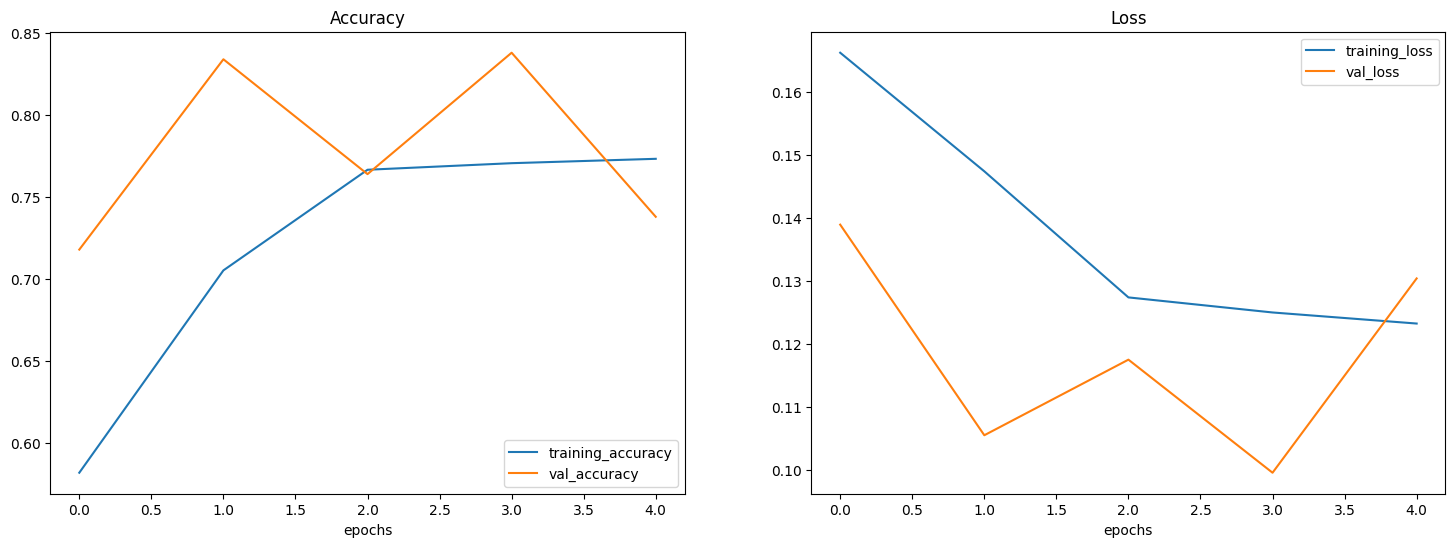

In [ ]:
plot_loss_curves(history_8)

In [ ]:
# Create the model as model_8 with more filters
model_9=Sequential([
    Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(32,3,activation='relu'),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_9.compile(optimizer=Adam(),
               loss=BinaryFocalCrossentropy(),
               metrics=['accuracy'])

history_9=model_9.fit(train_data_augmented_shuffled,batch_size=32,epochs=5,
           validation_data=test_data,validation_batch_size=32)

/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.5574 - loss: 0.1783 - val_accuracy: 0.8140 - val_loss: 0.1170
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.7403 - loss: 0.1380 - val_accuracy: 0.8320 - val_loss: 0.1165
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7587 - loss: 0.1352 - val_accuracy: 0.8420 - val_loss: 0.0963
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.7766 - loss: 0.1334 - val_accuracy: 0.8360 - val_loss: 0.1053
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7831 - loss: 0.1250 - val_accuracy: 0.8020 - val_loss: 0.1085


In [ ]:
model_9.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 786ms/step - accuracy: 0.7029 - loss: 0.1471


[0.1085277572274208, 0.8019999861717224]

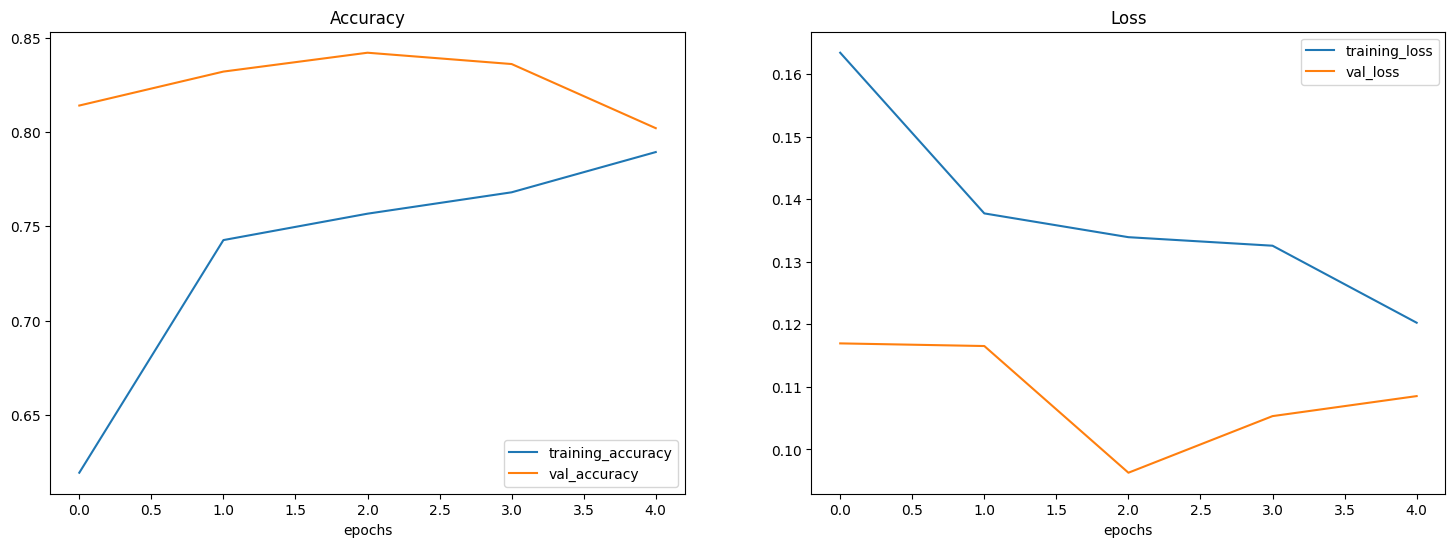

In [ ]:
plot_loss_curves(history_9)

### Making a prediction with our trained model on our custom data

In [7]:
class_names

array([], dtype=float64)

In [8]:
# Gen an example image
!wget 'https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg'
# This download command does not work corrctly, you should download image mannually

--2024-08-17 06:46:21--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 178.14K  --.-KB/s    in 0.05s   

2024-08-17 06:46:21 (3.53 MB/s) - ‘03-steak.jpeg’ saved [182414]



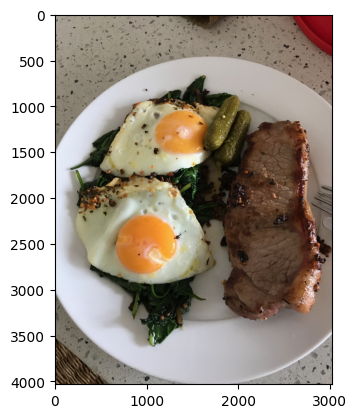

In [ ]:
steak=plt.imread("steak.jpeg")
plt.imshow(steak)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
type(steak), steak.dtype

(numpy.ndarray, dtype('uint8'))

In [ ]:
steak.ndim

3

In [ ]:
steak.nbytes

36578304

In [ ]:
4032*3024*3, 224*224*3

(36578304, 150528)

In [ ]:
expanded_steak=tf.expand_dims(steak,axis=0)

In [ ]:
expanded_steak.shape

TensorShape([1, 4032, 3024, 3])

In [26]:
# Create a function to preprocess an image: reshape
def load_and_prep_img(filename,imgshape=224):
    # Read in the image
    img=tf.io.read_file(filename)

    # Decode the read file into a tensor
    img=tf.image.decode_image(img)

    # Resize the image
    img=tf.image.resize(img,[imgshape,imgshape])

    # Rescale the image
    img=img/255.

    # Expand the image dimention, because the prediction function expext 4 dimention (first for batch)
    img=tf.expand_dims(img, axis=0)

    return img

In [ ]:
img=load_and_prep_img('steak.jpeg')
img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred=model_7.predict(img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.6710042]], dtype=float32)

In [ ]:
model_8.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.7287239]], dtype=float32)

In [ ]:
model_9.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.738561]], dtype=float32)

In [10]:
class_names

array([], dtype=float64)

In [ ]:
class_names[int(tf.round(pred))]

'steak'

In [ ]:
tf.round(pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
int(tf.round(pred))

1

In [30]:
def pred_and_plot(model,filename,class_names=class_names):
    import matplotlib.pyplot as plt
    
    # Import the target image and preprocess it
    img=load_and_prep_img(filename)

    # Make a prediction
    pred=model.predict(img)
    print(pred)

    # Get the prediction class name
    if len(pred[0]) <= 1:
        pred_class= class_names[int(tf.round(pred))]
    else:
        pred_class= class_names[tf.argmax(pred)[0]]

    print(pred_class)

    # Plot the image and prediction class
    plt.imshow(img[0,])
    plt.title(f'Prediction: {pred_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.6710042]]


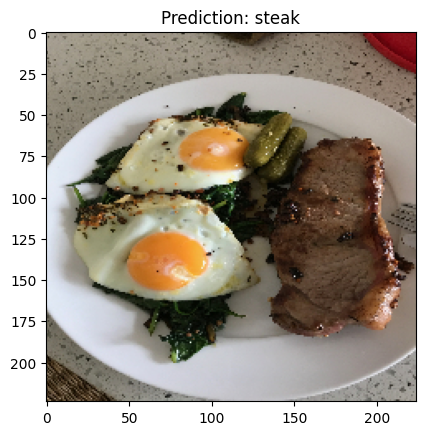

In [ ]:
pred_and_plot(model_7,'steak.jpeg')

In [ ]:
# Let's test on another image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2024-08-16 14:00:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  48.0KB/s    in 53s     

2024-08-16 14:01:51 (52.7 KB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.39162743]]


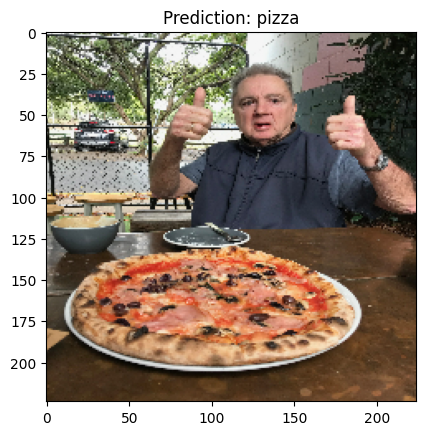

In [ ]:
pred_and_plot(model_7,'03-pizza-dad.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.22677231]]


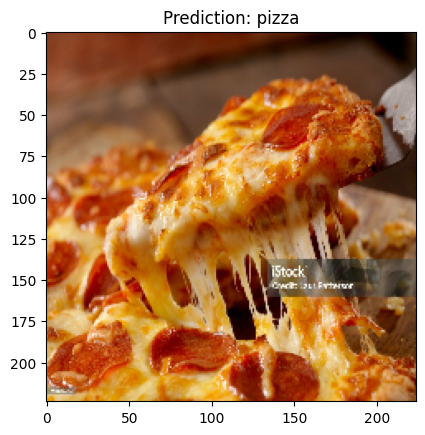

In [ ]:
pred_and_plot(model_7,'pizza.jpg')

## Multi-class image classification

1. Become one with the data
2. Preprocess the data
3. Create a model (start with baseline)
4. Fit the model (over fit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

### 1. Import and become one with the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# I have download it manually

--2024-08-17 06:47:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   106MB/s    in 5.1s    

2024-08-17 06:47:12 (96.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [13]:
import zipfile

zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

In [1]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 10 directories and 0 images in 10_fo

In [2]:
!ls  '10_food_classes_all_data'

test  train


In [3]:
!ls -la '10_food_classes_all_data'

total 16
drwxrwxr-x  4 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 16 18:30 .
drwxrwxr-x  6 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 17 10:37 ..
drwxrwxr-x 12 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 16 18:30 test
drwxrwxr-x 12 mohammad-hossein-abedi mohammad-hossein-abedi 4096 Aug 16 18:30 train


In [4]:
# Setup the train and test directories
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [5]:
# Getting the class names
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
type(class_names), class_names.dtype

(numpy.ndarray, dtype('<U14'))

In [7]:
# Visualize
img= view_random_image(train_dir,random.choice(class_names))

NameError: name 'view_random_image' is not defined

In [8]:
train_dir

'10_food_classes_all_data/train'

In [9]:
random.choice(class_names)

NameError: name 'random' is not defined

### 2. Preprocess the data (prepare it for a model)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it to batches
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224), class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224), class_mode='categorical')

2024-08-17 10:40:06.338125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-17 10:40:08.512883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [20]:
# Create out model same as CNN explainer website
model_10=Sequential([
    Conv2D(10,3, activation='relu' ,input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax') # Change the units number and activation function to have 10 output neurons
])

model_10.compile(optimizer=Adam(),
                loss=CategoricalCrossentropy(),
                metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Fit the model

In [21]:
history_10=model_10.fit(train_data, batch_size=32, epochs=5,
                       validation_data=test_data, validation_batch_size=32)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 135ms/step - accuracy: 0.1776 - loss: 2.2114 - val_accuracy: 0.2660 - val_loss: 2.0117
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.3468 - loss: 1.8775 - val_accuracy: 0.3432 - val_loss: 1.9256
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - accuracy: 0.5090 - loss: 1.4687 - val_accuracy: 0.3256 - val_loss: 2.0315
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.7139 - loss: 0.8961 - val_accuracy: 0.2936 - val_loss: 2.4599
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 133ms/step - accuracy: 0.8883 - loss: 0.3997 - val_accuracy: 0.2792 - val_loss: 3.3341


In [22]:
len(train_data), 235*32

(235, 7520)

### 5. Evaluate the model

In [25]:
# Evaluate the model on the test data
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2791 - loss: 3.3954


[3.3340983390808105, 0.2791999876499176]

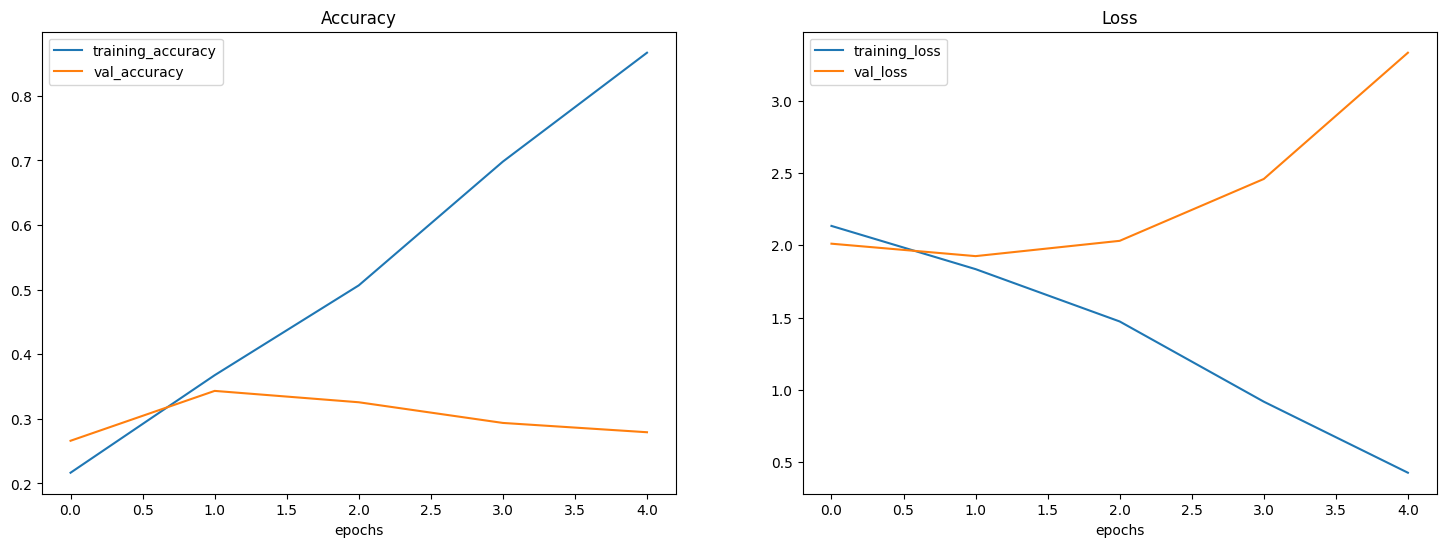

In [24]:
# Check out the model loss curves
plot_loss_curves(history_10)

It's seems our model is getting **overfitting**

### 6. Adjust our model hyperparameters (to beat the baseline/overfitting)

Due to it's overfitting on the training data it's clear our model is learning s.th. , however it's not generalized well to unseen data

Reduce overfitting:

- Add more data
- Add data augmentation
- Simplify the model (reduce conv layers or conv units)
- Add reqularization layers (such as MaxPool2D)
- Better data
- Transfer learning

In [26]:
model_10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [27]:
# Let,s simplify our model by removing 2 convolutional layers
model_11=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_11.compile(optimizer=Adam(),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model_11.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Fit the model with 2x conv layers removed
history_11= model_11.fit(train_data, batch_size=32, epochs=5,
                         validation_data=test_data, validation_batch_size=32)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 122ms/step - accuracy: 0.1886 - loss: 2.3783 - val_accuracy: 0.2904 - val_loss: 1.9708
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 111ms/step - accuracy: 0.3590 - loss: 1.8341 - val_accuracy: 0.2972 - val_loss: 1.9701
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.4717 - loss: 1.5801 - val_accuracy: 0.3212 - val_loss: 1.9728
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.6317 - loss: 1.1829 - val_accuracy: 0.3060 - val_loss: 2.1723
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 112ms/step - accuracy: 0.7781 - loss: 0.7504 - val_accuracy: 0.2940 - val_loss: 2.5830


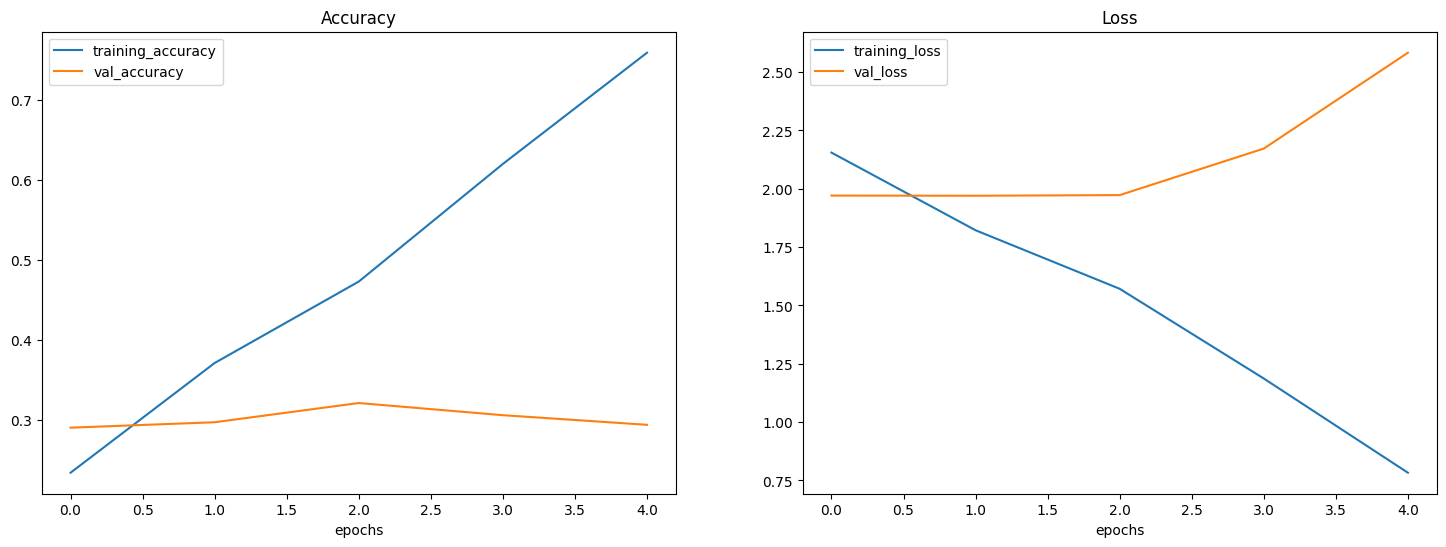

In [30]:
# Chekout the model 11 loss curves
plot_loss_curves(history_11)

#### Trying to reduce overfitting with data augmentation

Ideally we want to:
- Reduce overfitting (get train and validation loss cueves closer)
- Improve validation accuracy

In [11]:
# Create an augmented data generator instance
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=.2,
                                           width_shift_range=.2,
                                           height_shift_range=.2,
                                           zoom_range=.2,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 class_mode='categorical', )

Found 7500 images belonging to 10 classes.


In [14]:
# Create another model and fit it on the augmented data
#model_12=tf.keras.models.clone_model(model_10)
model_12=Sequential([
    Conv2D(10,3, activation='relu' ,input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax') # Change the units number and activation function to have 10 output neurons
])

model_12.compile(optimizer=Adam(),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])



/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-17 10:41:18.756862: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
# fit the model 12
histort_12= model_12.fit(train_data_augmented, batch_size=32, epochs=5,
                         validation_data=test_data, validation_batch_size=32)

# It tooks more time because we have fit the model's train data with augmented data
# and train data augmentation is done on the fly

Epoch 1/5


/home/mohammad-hossein-abedi/Documents/Code/Tensorflow_Certificate/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.1698 - loss: 2.2341 - val_accuracy: 0.3008 - val_loss: 2.0005
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.2705 - loss: 2.0523 - val_accuracy: 0.3472 - val_loss: 1.9069
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.3095 - loss: 1.9626 - val_accuracy: 0.3908 - val_loss: 1.7664
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.3326 - loss: 1.8930 - val_accuracy: 0.3924 - val_loss: 1.7591
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.3455 - loss: 1.8880 - val_accuracy: 0.3912 - val_loss: 1.7730


In [16]:
# Evaluate model 12
model_12.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 410ms/step - accuracy: 0.3747 - loss: 1.8220


[1.7729895114898682, 0.3912000060081482]

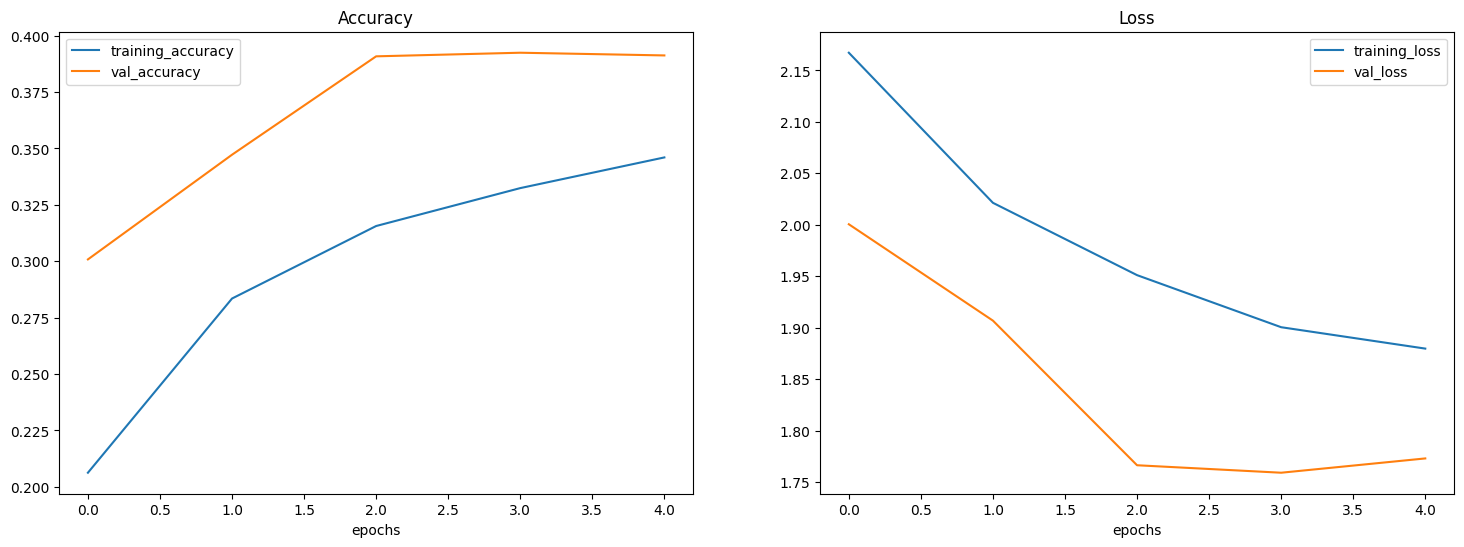

In [22]:
plot_loss_curves(histort_12)

Loss curves are much closer to each other than the base line model, so if we train longer our model might achieve more accuracy

### 7. Repeat until satisfied

By running lots of experiments, namely:

- Restructuring our model's architecture (increase layers / hidden units)
- Adjust learning rate
- Different method of data augmentation
- Training for longer
- Transfer learning

In [53]:
# Create a model the same as model 12 and train it longer
model_13=tf.keras.models.clone_model(model_12)
model_13.compile(optimizer=Adam(),
                 loss=CategoricalCrossentropy(),
                 metrics=['accuracy'])

history_13= model_13.fit(train_data_augmented, batch_size=32, epochs=20,
                         validation_data=test_data, validation_batch_size=32)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.1330 - loss: 2.3234 - val_accuracy: 0.2336 - val_loss: 2.1311
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.2154 - loss: 2.1444 - val_accuracy: 0.2872 - val_loss: 1.9872
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.2449 - loss: 2.0865 - val_accuracy: 0.3148 - val_loss: 1.9109
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.2791 - loss: 2.0109 - val_accuracy: 0.3560 - val_loss: 1.8340
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.3067 - loss: 1.9671 - val_accuracy: 0.3940 - val_loss: 1.7736
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.3156 - loss: 1.9493 - val_accuracy: 0.4032 - val_loss: 1.7394
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.3379 - loss: 1.9019 - val_accuracy: 0.4148 - val_loss: 1.7077
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.3486 - loss: 1.8916 - val_accu

In [54]:
model_13.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 412ms/step - accuracy: 0.4907 - loss: 1.5245


[1.5350812673568726, 0.4952000081539154]

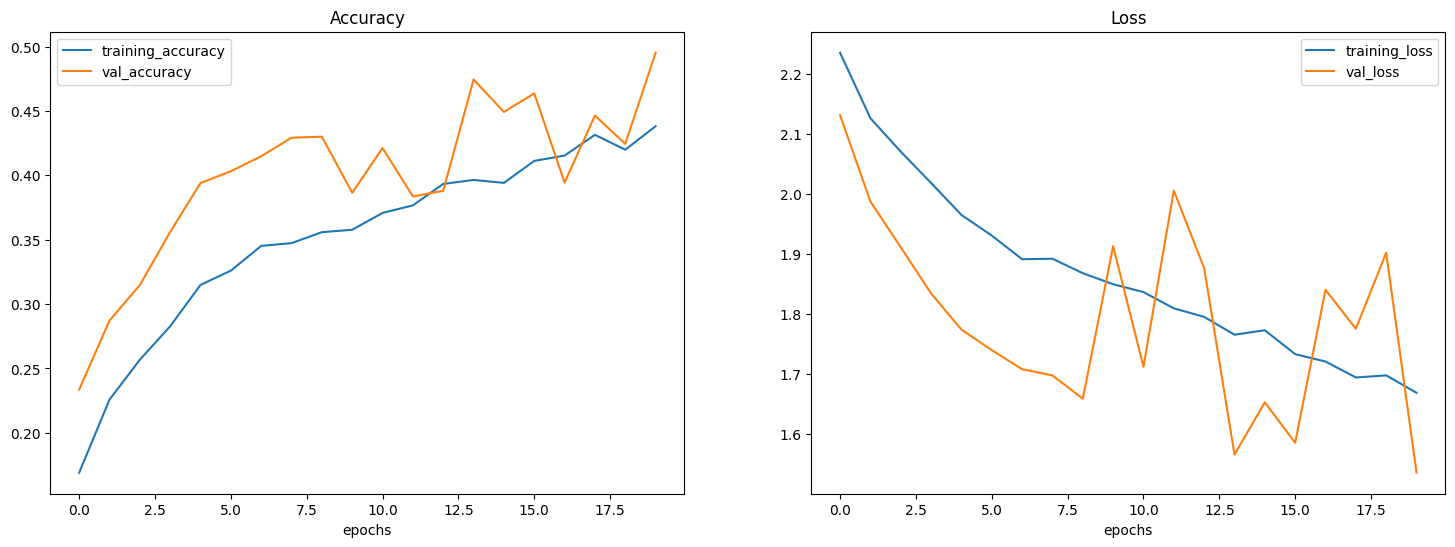

In [55]:
plot_loss_curves(history_13)

### Making a prediction with our trained model on a custom data

In [24]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [23]:
# Download some custom images
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2024-08-17 11:20:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M   691KB/s    in 5.8s    

2024-08-17 11:20:57 (602 KB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2024-08-17 11:20:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.11136717 0.11732344 0.00528709 0.09340713 0.03106804 0.06061646
  0.26686075 0.0656505  0.03628264 0.21213675]]
chicken_curry


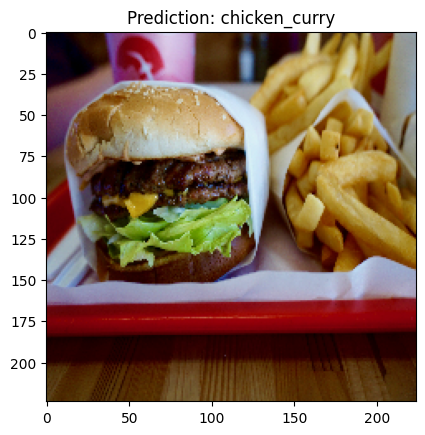

In [31]:
pred_and_plot(model_12, '03-hamburger.jpeg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.01519978 0.17060834 0.01103219 0.02114165 0.06378817 0.19131528
  0.2066081  0.03370064 0.07637497 0.21023086]]
chicken_curry


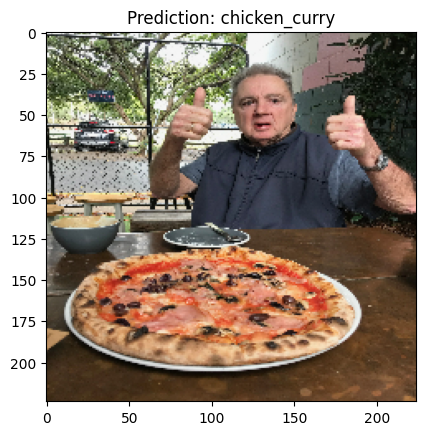

In [32]:
pred_and_plot(model_12, '03-pizza-dad.jpeg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.02532781 0.11185426 0.01059747 0.39662787 0.0810632  0.07771161
  0.01116804 0.03494972 0.20184328 0.04885682]]
chicken_curry


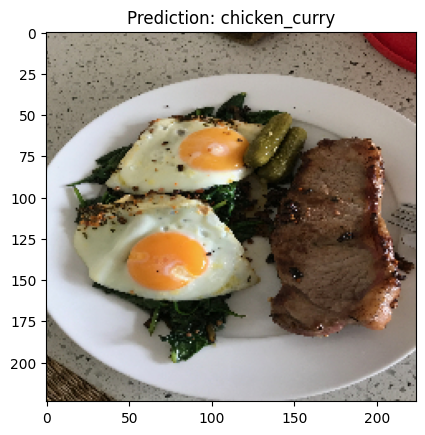

In [33]:
pred_and_plot(model_12, '03-steak.jpeg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.22340442 0.29719245 0.00603613 0.07338173 0.06181673 0.00577316
  0.23784876 0.01187374 0.01233253 0.07034044]]
chicken_curry


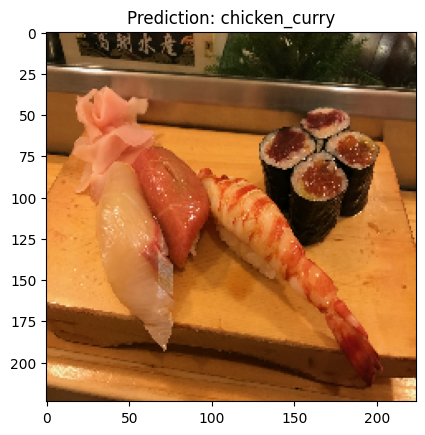

In [34]:
pred_and_plot(model_12, '03-sushi.jpeg', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.08578283 0.07486478 0.03187852 0.04974975 0.03643573 0.00089785
  0.65725034 0.00826718 0.00368444 0.05118861]]
chicken_curry


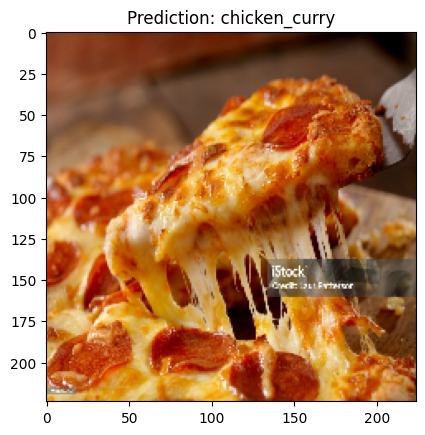

In [35]:
pred_and_plot(model_12, 'pizza.jpg', class_names)

In [36]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Saving and loading our model

In [40]:
# Save the model
model_12.save('saved_trained_model_12.keras')

In [45]:
# Load the trained model and evaluate it
loaded_model_12=tf.keras.models.load_model('saved_trained_model_12.keras')
loaded_model_12.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 421ms/step - accuracy: 0.3879 - loss: 1.7763


[1.7729896306991577, 0.3912000060081482]

In [46]:
model_12.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 424ms/step - accuracy: 0.3986 - loss: 1.7940


[1.7729895114898682, 0.3912000060081482]